In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000,
  input_dim=784,
  kernel_initializer='normal',
  activation='relu'))


#將「輸出層」加入模型
model.add(Dense(units=10,
  kernel_initializer='normal',
  activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
  y=y_Train_OneHot,validation_split=0.2,
  epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.2945 - acc: 0.9151 - val_loss: 0.1527 - val_acc: 0.9565
Epoch 2/10
 - 4s - loss: 0.1180 - acc: 0.9659 - val_loss: 0.1076 - val_acc: 0.9682
Epoch 3/10
 - 4s - loss: 0.0760 - acc: 0.9781 - val_loss: 0.0923 - val_acc: 0.9733
Epoch 4/10
 - 4s - loss: 0.0516 - acc: 0.9853 - val_loss: 0.0867 - val_acc: 0.9738
Epoch 5/10
 - 4s - loss: 0.0358 - acc: 0.9904 - val_loss: 0.0754 - val_acc: 0.9757
Epoch 6/10
 - 4s - loss: 0.0256 - acc: 0.9935 - val_loss: 0.0738 - val_acc: 0.9772
Epoch 7/10
 - 4s - loss: 0.0182 - acc: 0.9960 - val_loss: 0.0718 - val_acc: 0.9803
Epoch 8/10
 - 5s - loss: 0.0133 - acc: 0.9971 - val_loss: 0.0712 - val_acc: 0.9789
Epoch 9/10
 - 4s - loss: 0.0089 - acc: 0.9987 - val_loss: 0.0716 - val_acc: 0.9801
Epoch 10/10
 - 5s - loss: 0.0063 - acc: 0.9991 - val_loss: 0.0732 - val_acc: 0.9795


In [5]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

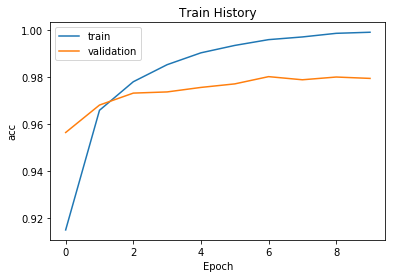

In [6]:
show_train_history(train_history,'acc','val_acc')

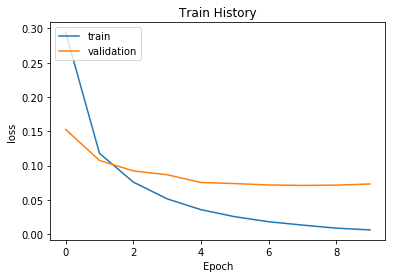

In [7]:
show_train_history(train_history,'loss','val_loss')

In [8]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 66us/step

accuracy= 0.9797


In [9]:
prediction=model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

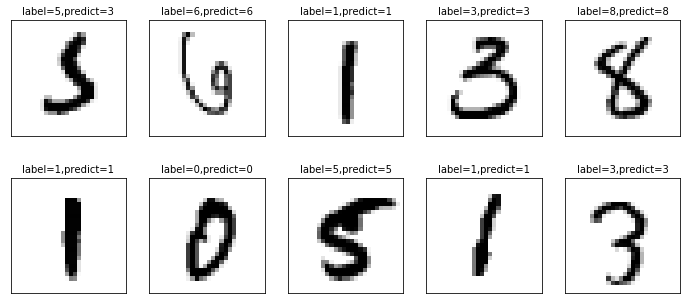

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    
    ax.set_title("label=" +str(labels[idx])+
      ",predict="+str(prediction[idx])
      ,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
  
plot_images_labels_prediction(x_test_image,y_test_label,
  prediction,idx=340)

In [11]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,1,0,1,1,2,0
1,0,1128,2,1,0,1,1,1,1,0
2,2,1,1008,6,3,0,2,6,4,0
3,2,0,1,997,0,2,0,4,3,1
4,1,2,5,1,963,0,2,1,1,6
5,4,0,0,21,1,853,6,1,3,3
6,3,3,0,1,4,4,942,0,1,0
7,1,4,7,4,0,0,0,1008,2,2
8,3,0,4,14,3,0,2,3,943,2


In [13]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [14]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
2035,5,3
2162,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3


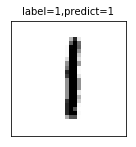

In [18]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=330,num=1)

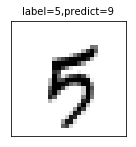

In [19]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=1289,num=1)